In [1]:
import tensorflow as tf
import numpy as np 
import keras
import matplotlib.pyplot as plt 

In [2]:
np.random.seed(0)

In [3]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs.git

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [4]:
import pickle

In [5]:
with open('german-traffic-signs/train.p', 'rb') as f:
    train_data = pickle.load(f)

    # unpickling the validation data
with open('german-traffic-signs/valid.p', 'rb') as f:
    valid_data = pickle.load(f)

# unpickling the test data
with open('german-traffic-signs/test.p', 'rb') as f:
    test_data = pickle.load(f)

In [6]:
type(train_data)

dict

In [7]:
len(train_data)

4

In [8]:
%ls german-traffic-signs

 Volume in drive C has no label.
 Volume Serial Number is 7E29-D65E

 Directory of C:\Users\Natsu\Tensorflow\german-traffic-signs

12/04/2021  02:13 PM    <DIR>          .
12/04/2021  02:13 PM    <DIR>          ..
12/04/2021  02:13 PM            54,767 30_0.jpg
12/04/2021  02:13 PM            47,878 50_0.png
11/29/2021  11:48 PM             1,043 signnames.csv
11/29/2021  11:48 PM        38,888,118 test.p
11/29/2021  11:48 PM       107,146,452 train.p
11/29/2021  11:48 PM        13,578,712 valid.p
               6 File(s)    159,716,970 bytes
               2 Dir(s)  320,339,980,288 bytes free


In [9]:
%ls valid_data

 Volume in drive C has no label.
 Volume Serial Number is 7E29-D65E

 Directory of C:\Users\Natsu\Tensorflow



File Not Found


In [10]:
x_train = train_data['features']

In [11]:
y_train =  train_data['labels']

In [12]:
x_val = valid_data['features']
y_val = valid_data['labels']


In [13]:
x_test, y_test = test_data['features'], test_data['labels']

In [14]:
x_train.shape

(34799, 32, 32, 3)

In [15]:
x_test.shape

(12630, 32, 32, 3)

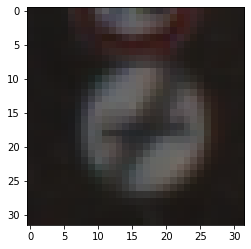

In [16]:
plt.imshow(x_train[0])
plt.show()

In [17]:
#verifying if num of images have the num of labels
assert(x_train.shape[0] == y_train.shape[0]), 'The number of images not equal to number of labels'
assert(x_test.shape[0] == y_test.shape[0]), 'The number of images not equal to number of labels'
assert(x_val.shape[0] == y_val.shape[0]), 'The number of images not equal to number of labels'


#verifying if the the shape of all images is equal to (32,32,3)
assert(x_train.shape[1:] == (32,32,3)), 'The dimesions are not the same'
assert(x_test.shape[1:] == (32,32,3)), 'The dimesions are not the same'
assert(x_val.shape[1:] == (32,32,3)), 'The dimesions are not the same'

In [18]:
import pandas as pd
df = pd.read_csv('german-traffic-signs/signnames.csv')
df.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


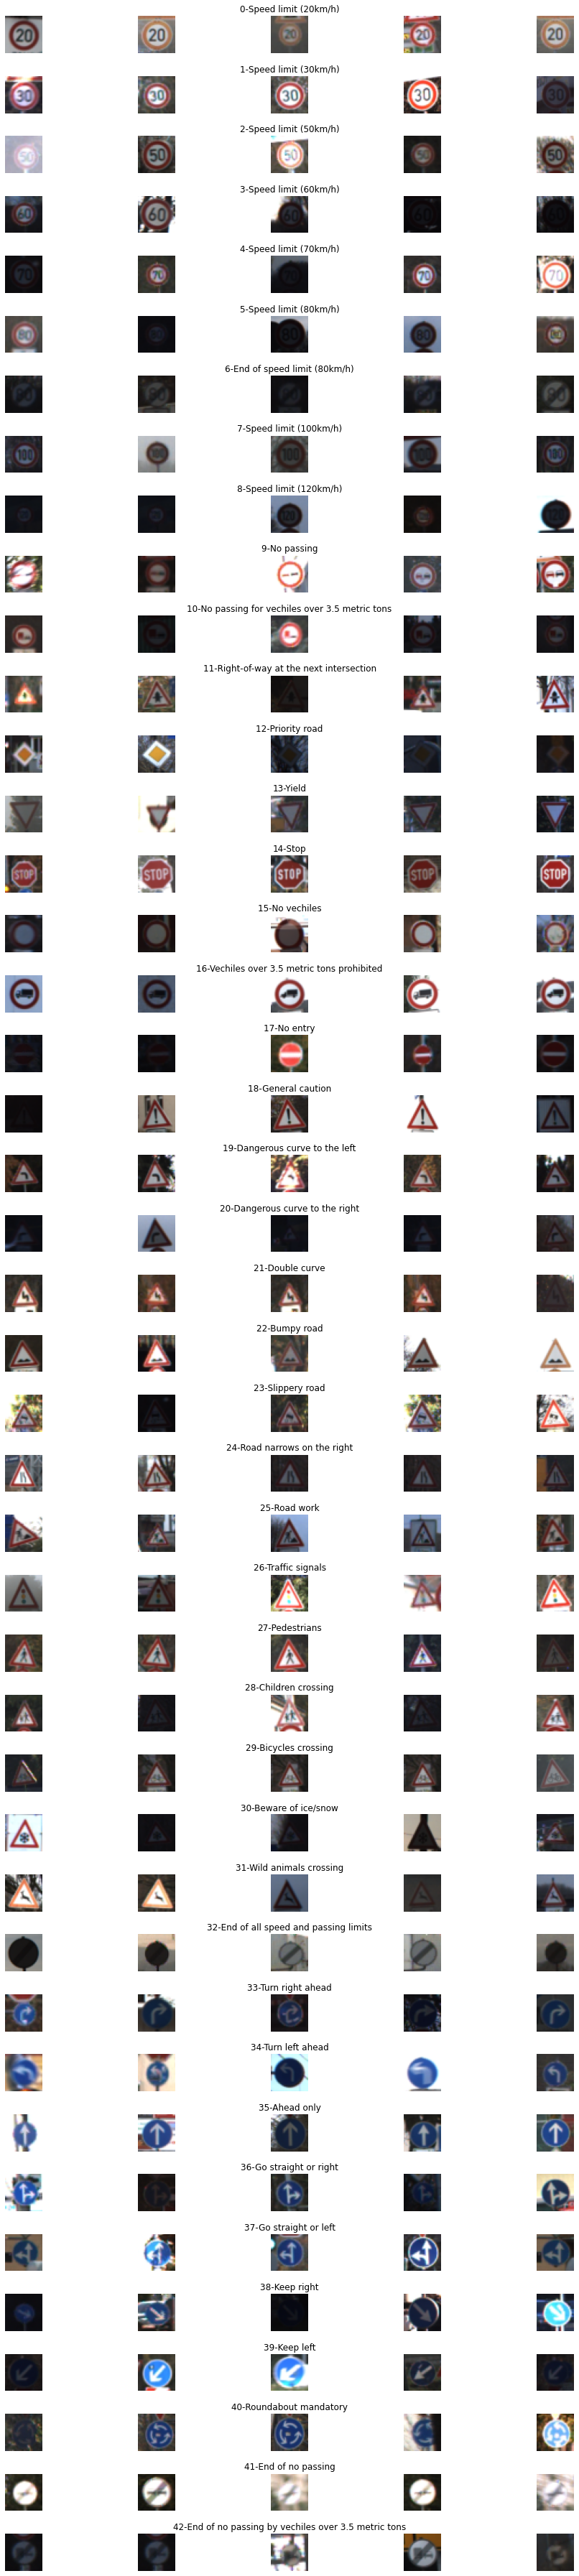

In [19]:
#converting csv dataset to  images
num_samples = []
cols = 5
num_classes = 43
fig, axis = plt.subplots(nrows=num_classes, ncols=cols, figsize=(13,50))
fig.tight_layout()

for i in range(cols):
    for j, row in df.iterrows():
        x_sel = x_train[y_train == j]
        axis[j][i].imshow(x_sel[np.random.randint(0, (len(x_sel) -1)), :, :], cmap='gray')
        axis[j][i].axis('off')
        if i ==2:
            axis[j][i].set_title(str(j) + '-' + row['SignName'])
            num_samples.append(len(x_sel))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


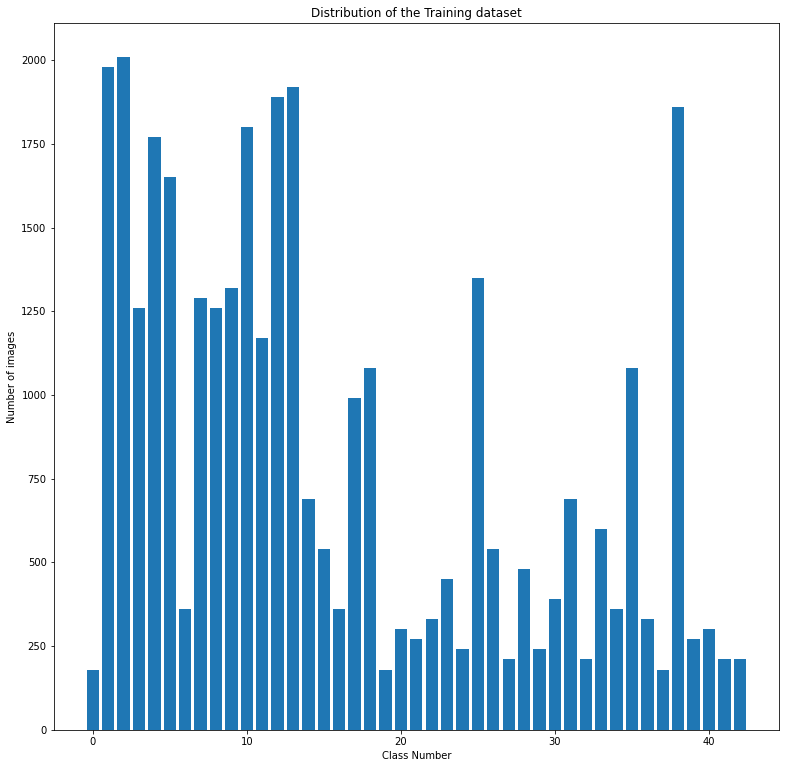

In [20]:
print(num_samples)
plt.figure(figsize=(13,13))
plt.bar(range(0, num_classes), num_samples)
plt.title('Distribution of the Training dataset')
plt.xlabel('Class Number')
plt.ylabel('Number of images')
plt.show()

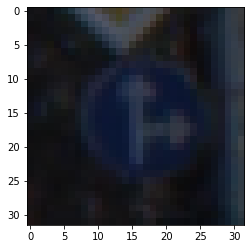

(32, 32, 3)
36


In [21]:
import cv2 as cv 
plt.imshow(x_train[1000])
plt.show()
print(x_train[1000].shape)
print(y_train[1000])

In [22]:
#preprocesing as it doesn't matter the color in detecting the 
#signals we better convert this to grayscale

def conv_gray(img):
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    return img

In [23]:
img = conv_gray(x_train[13])

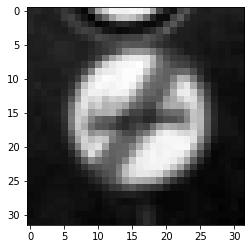

(32, 32)

In [24]:
plt.imshow(img, cmap='gray')
plt.show()
img.shape

In [25]:
#using histogram effet this is because not all of the input images have the same
# brightness or colors but after using this all become equal 
#i.e., pixel intensity is brought to equal 
#enhances contrast making the b&w images better 

def equalize(img):
    img = cv.equalizeHist(img)
    return img

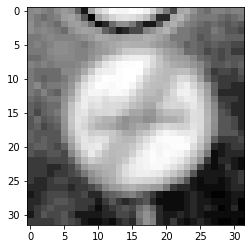

(0.0, 1.0, 0.0, 1.0)

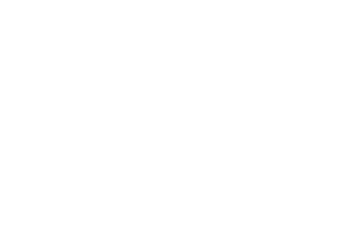

In [26]:
img = equalize(img)
plt.imshow(img, cmap='gray')
plt.show()
plt.axis('off')

In [27]:
#applying hist to all our images in dataset

def preprocess(img):
    img = conv_gray(img)
    img = equalize(img)
    #normalization i.e.,, dividing all the values by 255
    img = img / 255
    return img

In [28]:
x_train = np.array(list(map(preprocess, x_train)))
x_test = np.array(list(map(preprocess, x_test)))
x_val = np.array(list(map(preprocess, x_val)))

(34799, 32, 32)


(-0.5, 31.5, 31.5, -0.5)

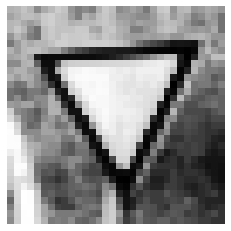

In [29]:
plt.imshow(x_train[np.random.randint(0, len(x_train) -1)], cmap='gray')
print(x_train.shape)
plt.axis('off')

In [30]:
# adding depth to our data 
x_train = x_train.reshape(34799, 32, 32, 1)
x_test = x_test.reshape(len(x_test), 32, 32, 1)
x_val = x_val.reshape(len(x_val), 32, 32, 1)

In [31]:
x_test.shape, x_train.shape, x_val.shape

((12630, 32, 32, 1), (34799, 32, 32, 1), (4410, 32, 32, 1))

In [32]:
#one hot encoding our labels data 
y_train = keras.utils.np_utils.to_categorical(y_train, 43)
y_test = keras.utils.np_utils.to_categorical(y_test, 43)
y_val = keras.utils.np_utils.to_categorical(y_val, 43)

In [102]:
from keras.preprocessing.image import ImageDataGenerator
data_gen = ImageDataGenerator(width_shift_range=0.21, height_shift_range=0.13,zoom_range=0.2 , shear_range=0.1, rotation_range=0.3)
data_gen.fit(x_train)

In [108]:
batches = data_gen.flow(x_train, y_train, batch_size=20)
x_batch, y_batch = next(batches),
fig, axs = plt.subplots(1,15,figsize=(20,15))
fig.tight_layout()

for i in range(15):
    axs[i].imshow(x_batch[i].reshape(32,32))
    axs[i].axis('off')

ValueError: not enough values to unpack (expected 2, got 1)

In [95]:
model = keras.Sequential([
    keras.layers.Conv2D(32, 5, input_shape=(32,32,1), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.Conv2D(60, 3, activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.34),
    data_aug,
    keras.layers.Flatten(),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dropout(0.23),
    keras.layers.Dense(43, activation='softmax')
])

In [96]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

training

In [97]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 12, 12, 32)        9248      
                                                                 
 conv2d_21 (Conv2D)          (None, 10, 10, 60)        17340     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 5, 5, 60)         0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 5, 5, 60)        

In [98]:
history = model.fit(x_train, y_train, epochs=15, validation_data=(x_val, y_val), batch_size=100, verbose=1, shuffle=True)

Epoch 1/15
348/348 [==============================] - 5s 13ms/step - loss: 1.9072 - accuracy: 0.4600 - val_loss: 0.6598 - val_accuracy: 0.8193loss: 2.0
Epoch 2/15
348/348 [==============================] - 4s 13ms/step - loss: 0.5507 - accuracy: 0.8296 - val_loss: 0.3403 - val_accuracy: 0.8982: 0.6650 - ac - ETA: 0s - loss: 0.5518 - accuracy: 0.
Epoch 3/15
348/348 [==============================] - 4s 13ms/step - loss: 0.3331 - accuracy: 0.8950 - val_loss: 0.2827 - val_accuracy: 0.9206
Epoch 4/15
348/348 [==============================] - 5s 13ms/step - loss: 0.2417 - accuracy: 0.9230 - val_loss: 0.2177 - val_accuracy: 0.9454
Epoch 5/15
348/348 [==============================] - 4s 13ms/step - loss: 0.1897 - accuracy: 0.9404 - val_loss: 0.1895 - val_accuracy: 0.9508
Epoch 6/15
348/348 [==============================] - 4s 13ms/step - loss: 0.1606 - accuracy: 0.9508 - val_loss: 0.2193 - val_accuracy: 0.9488
Epoch 7/15
348/348 [==============================] - 4s 13ms/step - loss: 0.135

In [99]:
model.evaluate(x_test, y_test)

395/395 [==============================] - 2s 5ms/step - loss: 0.2007 - accuracy: 0.9536: 0s - loss: 0.1980 - accuracy: 


[0.20068006217479706, 0.9536025524139404]

Text(0.5, 0, 'no of epochs')

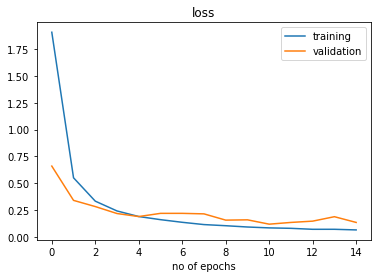

In [100]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('loss')
plt.xlabel('no of epochs')

Text(0.5, 0, 'no of epochs')

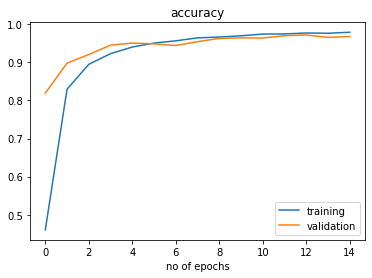

In [101]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('accuracy')
plt.xlabel('no of epochs')

In [83]:
## Fine Tuning the mod
model_1 = keras.Sequential([
    keras.layers.Conv2D(60, 5, input_shape=(32,32,1), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(60, 3, activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dropout(0.23),
    keras.layers.Dense(43, activation='softmax')
])


In [84]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [85]:
model_1.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=200, verbose=1, shuffle=True, epochs=5)

Epoch 1/5
174/174 [==============================] - 3s 15ms/step - loss: 1.3545 - accuracy: 0.6289 - val_loss: 0.4476 - val_accuracy: 0.8628
Epoch 2/5
174/174 [==============================] - 2s 13ms/step - loss: 0.2423 - accuracy: 0.9293 - val_loss: 0.2826 - val_accuracy: 0.9125
Epoch 3/5
174/174 [==============================] - 3s 16ms/step - loss: 0.1223 - accuracy: 0.9654 - val_loss: 0.2274 - val_accuracy: 0.9252
Epoch 4/5
174/174 [==============================] - 2s 14ms/step - loss: 0.0758 - accuracy: 0.9786 - val_loss: 0.2046 - val_accuracy: 0.9383
Epoch 5/5
174/174 [==============================] - ETA: 0s - loss: 0.0520 - accuracy: 0.98 - 2s 13ms/step - loss: 0.0519 - accuracy: 0.9851 - val_loss: 0.1881 - val_accuracy: 0.9370


In [43]:
model_1.evaluate(x_test, y_test)

395/395 [==============================] - 2s 5ms/step - loss: 0.2946 - accuracy: 0.9255: 1s - loss: 0.2751 - accu


[0.2945607602596283, 0.9254948496818542]

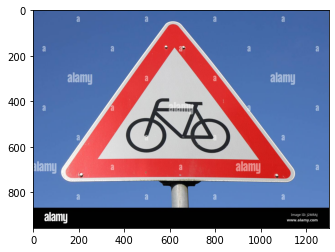

(0.0, 1.0, 0.0, 1.0)

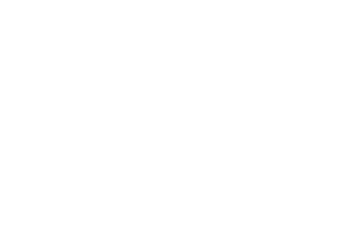

In [44]:
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/J2mRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap='gray')
plt.show()
plt.axis('off')


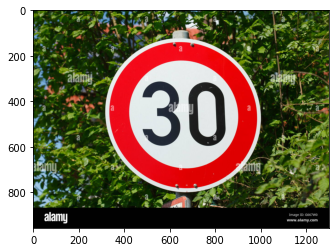

(0.0, 1.0, 0.0, 1.0)

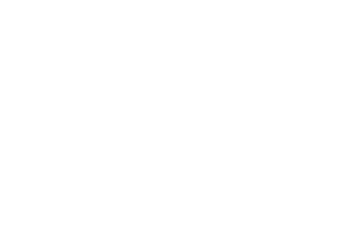

In [45]:
url = 'https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg'
r1 = requests.get(url, stream=True)
img_1 = Image.open(r1.raw)
plt.imshow(img_1, cmap='gray')
plt.show()
plt.axis('off')

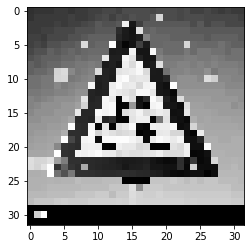

In [46]:
img = np.asarray(img)
img = cv.resize(img, (32,32))
img = preprocess(img)
plt.imshow(img, cmap='gray')
plt.show()



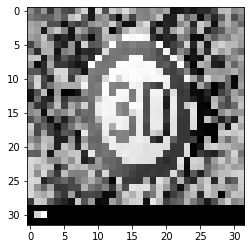

In [47]:
img_1 = np.asarray(img_1)
img_1 = cv.resize(img_1, (32,32))
img_1 = preprocess(img_1)
plt.imshow(img_1, cmap='gray')
plt.show()

In [48]:
img = img.reshape(1,32,32,1)
img_1 = img_1.reshape(1,32,32,1)

In [49]:
pred = np.argmax(model.predict(img))

In [50]:
pred

31

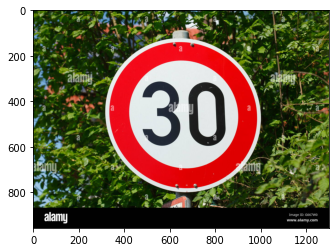

(0.0, 1.0, 0.0, 1.0)

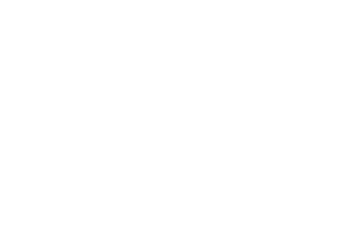

In [57]:
url = 'https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg'
r1 = requests.get(url, stream=True)
img_2 = Image.open(r1.raw)
plt.imshow(img_2, cmap='gray')
plt.show()
plt.axis('off')


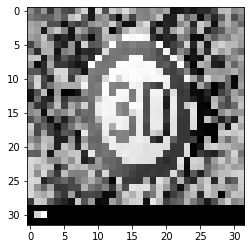

In [58]:
img_2 = np.asarray(img_2)
img_2 = cv.resize(img_2, (32,32))
img_2 = preprocess(img_2)
plt.imshow(img_2, cmap='gray')
plt.show()



In [59]:
img_2 = img_2.reshape(1,32,32,1)

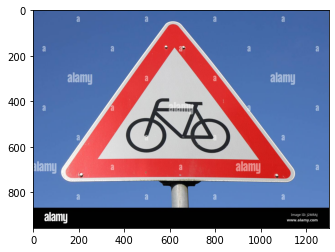

In [54]:
url = 'https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'
r1 = requests.get(url, stream=True)
img_3 = Image.open(r1.raw)
plt.imshow(img_3)
plt.show()

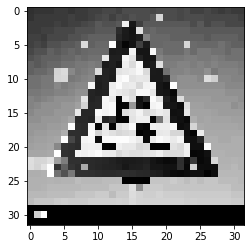

In [56]:
img_3 = np.asarray(img_3)
img_3 = cv.resize(img_3, (32,32))
img_3 = preprocess(img_3)
plt.imshow(img_3, cmap='gray')
plt.show()



In [60]:
img_3 = img_3.reshape(1,32,32,1)

In [61]:
pred = np.argmax(model.predict(img_3))
pred

31

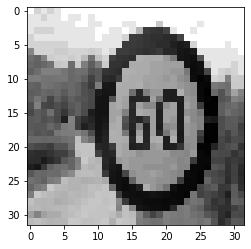

In [65]:
img_4 = np.asarray(img_4)
img_4 = cv.resize(img_4, (32,32))
img_4 = preprocess(img_4)
plt.imshow(img_4, cmap='gray')
plt.show()



In [66]:
img_4 = img_4.reshape(1,32,32,1)

In [67]:
pred = np.argmax(model.predict(img_4))

In [68]:
pred

5